For a simple linear regression model, the equation is given by y = b0 + b1*x. If the value of b0 is 4 and the value of b1 is 3, what is the predicted value of y for x=2?
Consider a multiple linear regression model with three independent variables x1, x2, and x3. The coefficients for these variables are given by b1=2, b2=3, and b3=4, respectively. What is the equation of the regression model?

10

In [753]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [704]:
df = pd.read_csv('datasets\scrap price.csv')
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
symboling,3.0,3.0,1.0,2.0,2.0
name,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltypes,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumbers,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheels,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [705]:
df=df.drop_duplicates()

In [706]:
df.drop(['Unnamed: 26'],axis=1,inplace=True)
df.drop(['Unnamed: 27'],axis=1,inplace=True)

In [707]:
df[df.ID.isnull()]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [708]:
df=df.drop(191)

In [709]:
df.wheelbase.unique()

array(['88.6', '94.5', '99.8', '99.4', '105.8', '99.5', '101.2', '103.5',
       '110', '88.4', '93.7', '103.3', '95.9', '86.6', '96.5', '94.3',
       '96', '113', '102', '93.1', '95.3', '98.8', '104.9', '106.7',
       '115.6', '96.6', '120.9', '112', '102.7', '93', '96.3', '#$%',
       '95.1', '97.2', '100.4', '91.3', '99.2', '107.9', '114.2', '108',
       '89.5', '#$', '98.4', '96.1', '99.1', '93.3', '97', '96.9', '95.7',
       '"69*/"', '102.4', '102.9', '104.5', '97.3', '$%98', '104.3',
       '109.1'], dtype=object)

In [710]:
df['wheelbase']=df.wheelbase.str.replace("#","",regex=False)
df['wheelbase']=df.wheelbase.str.replace("$","",regex=False)
df['wheelbase']=df.wheelbase.str.replace("%","",regex=False)
df['wheelbase']=df.wheelbase.str.replace("*","",regex=False)
df['wheelbase']=df.wheelbase.str.replace('"',"",regex=False)
df['wheelbase']=df.wheelbase.str.replace('/',"",regex=False)
df['wheelbase']=df.wheelbase.replace("",np.nan,regex=False)

In [711]:
noise=[]
for i in df.wheelbase:
    try:
        float(i)
    except:
        noise.append(i)
        print(df[df.wheelbase==i].T)

In [712]:
noise

[]

In [713]:
df.wheelbase.median()

97.0

In [714]:
df.wheelbase.fillna(df.wheelbase.median(),inplace=True)

In [715]:
noise=[]
for i in df.carwidth:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

#$%


In [716]:
df.carwidth = pd.to_numeric(df['carwidth'],errors="coerce")

In [717]:
df.carwidth.mode()

0    63.8
Name: carwidth, dtype: float64

In [718]:
df.carwidth.fillna(63.8,inplace=True)

In [719]:
df.wheelbase = pd.to_numeric(df['wheelbase'],errors="coerce")

In [720]:
noise=[]
for i in df.curbweight:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

(OP*/)


In [721]:
df.curbweight=pd.to_numeric(df['curbweight'],errors="coerce")

In [722]:
df.curbweight.mode()

0    2385.0
Name: curbweight, dtype: float64

In [723]:
df.curbweight.fillna(2385.0,inplace=True)

In [724]:
df.curbweight=df.curbweight.astype(int)

In [725]:
df.enginesize.unique()

array(['130', '152', '109', '136', '131', '108', '164', '209', '61', '90',
       '98', '122', '156', '92', '79', '110', '111', '119', '258', '326',
       '91', '70', '80', 'po/*', '140', '134', '183', '234', '308', '304',
       '97', '103', '120', '181', '$%98', '151', '194', '203', '132',
       '121', '146', '171', '161', '141', '173', '145'], dtype=object)

In [726]:
noise=[]
for i in df.enginesize:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

po/* $%98


In [727]:
df.enginesize.mode()

0    92
Name: enginesize, dtype: object

In [728]:
df.carwidth = pd.to_numeric(df['carwidth'],errors="coerce")

In [729]:
df.enginesize=df.enginesize.replace("$%",'',regex=False)
df.enginesize=pd.to_numeric(df['enginesize'],errors="coerce")
df.enginesize.fillna(92.0,inplace=True)
df.enginesize=df.enginesize.astype(int)

In [730]:
df.stroke.mode()

0    3.4
Name: stroke, dtype: object

In [731]:
noise=[]
for i in df.stroke:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

E#$


In [732]:
df.stroke=pd.to_numeric(df['stroke'],errors="coerce")
df.stroke.fillna(3.4,inplace=True)

In [733]:
df.peakrpm.mode()

0    5500
Name: peakrpm, dtype: object

In [734]:
noise=[]
for i in df.peakrpm:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

(OP*/)


In [735]:
df.peakrpm=pd.to_numeric(df['peakrpm'],errors="coerce")
df.peakrpm.fillna(5500,inplace=True)

In [736]:
df.citympg.unique()

array(['21', '19', '24', '18', '17', '16', '23', '20', '15', '47', '38',
       '37', '31', '49', '30', '27', '25', '13', '26', '36', '22', '14',
       'po/*', '45', '28', '32', '35', '34', '29', '#$', '33'],
      dtype=object)

In [737]:

noise=[]
for i in df.citympg:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

po/* #$


In [738]:
df.citympg=pd.to_numeric(df['citympg'],errors="coerce")
df.citympg.fillna(method='ffill',inplace=True)

In [739]:
df.highwaympg.unique()

array(['27', '26', '30', '22', '25', '20', '29', '28', '53', '43', '41',
       '38', '24', '54', '42', '34', '33', '31', '19', '17', '23', '32',
       '39', '18', '16', '37', '50', '36', '$%98', '47', '46'],
      dtype=object)

In [740]:

noise=[]
for i in df.highwaympg:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

$%98


In [741]:
df.highwaympg=df.highwaympg.replace("$%",'',regex=False)
df.highwaympg=pd.to_numeric(df['highwaympg'],errors="coerce")
df.highwaympg.fillna(method='ffill',inplace=True)

In [742]:
df.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [743]:
df['Company_Name'] = df['name'].str.split(' ', n=1).str[0]

In [744]:
df.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [745]:
desc=pd.DataFrame(index=list(df))
desc['count']=df.shape[0]
desc['null']=df.isnull().sum()
desc['dtype']=df.dtypes
desc['unique']= df.nunique()
desc['%unique'] = desc['unique']/len(df)
desc=pd.concat([desc,df.describe().T],axis=1)
desc

,count,null,dtype,unique,%unique,count,mean,std,min,25%,50%,75%,max
ID,205,0,float64,205,1.000000,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205,0,float64,6,0.029268,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
name,205,0,object,147,0.717073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltypes,205,0,object,2,0.009756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,0,object,2,0.009756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumbers,205,0,object,2,0.009756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,0,object,5,0.024390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheels,205,0,object,3,0.014634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,0,object,2,0.009756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205,0,float64,55,0.268293,205.0,98.678537,6.329624,69.00,94.50,97.00,102.40,120.90


In [746]:
cormat=df.corr()

C:\Users\farzi\AppData\Local\Temp\ipykernel_18152\1779996486.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat=df.corr()


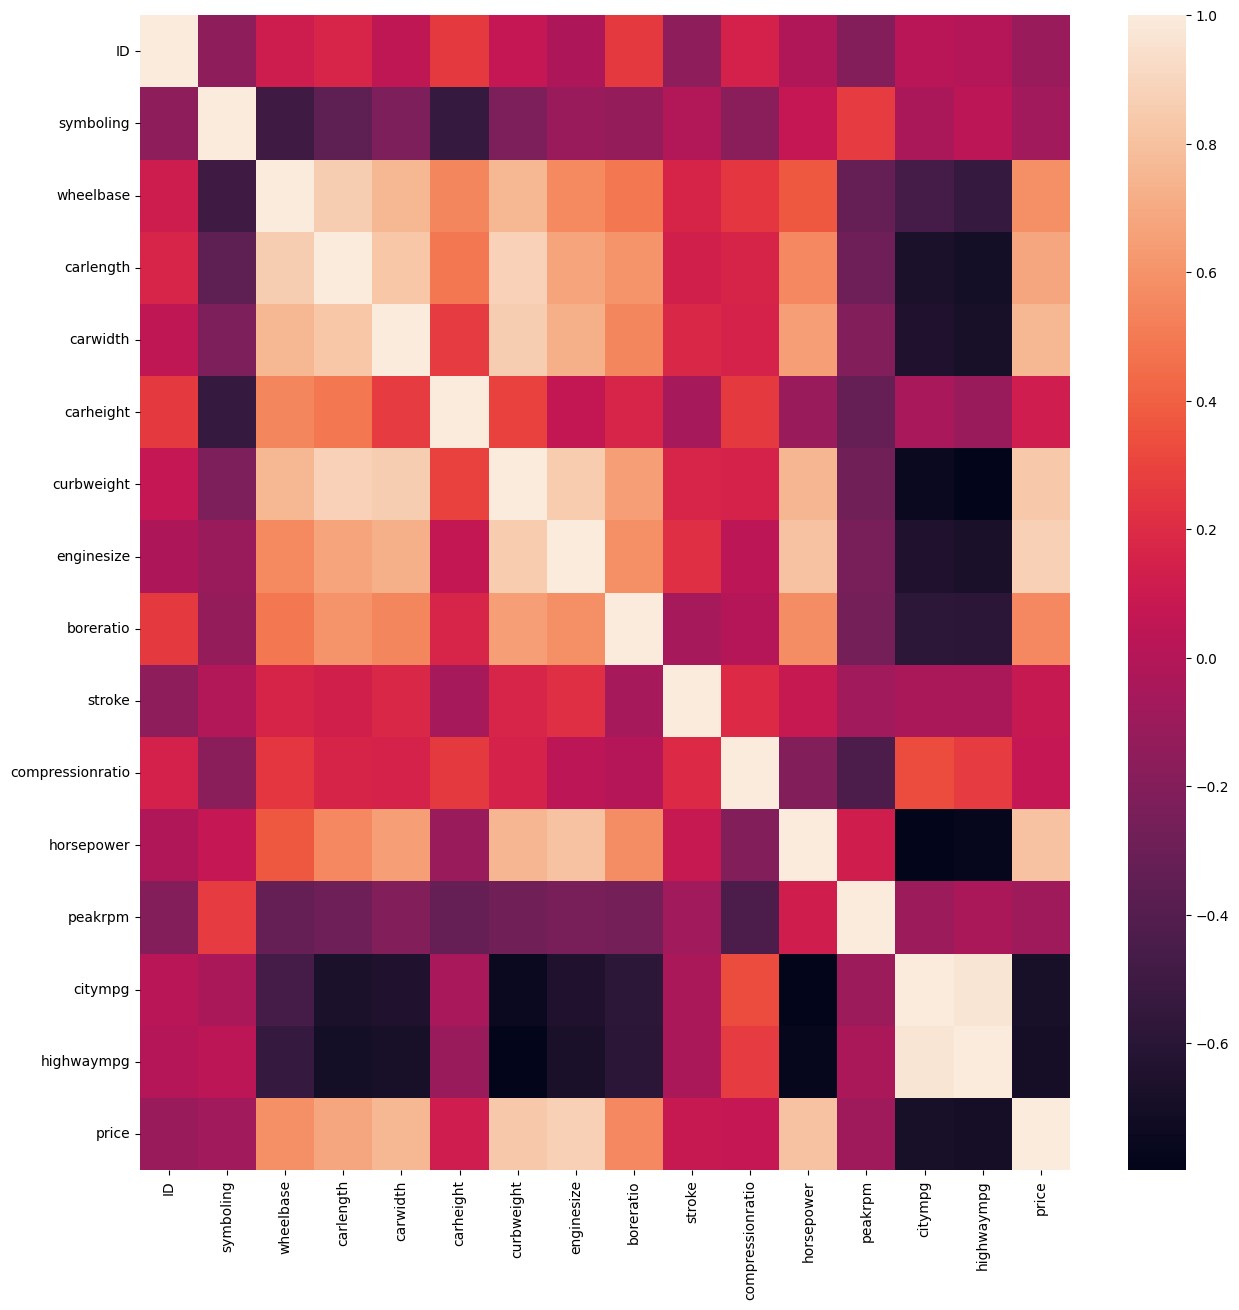

In [747]:
plt.figure(figsize=(15,15))
sns.heatmap(cormat)
plt.show()

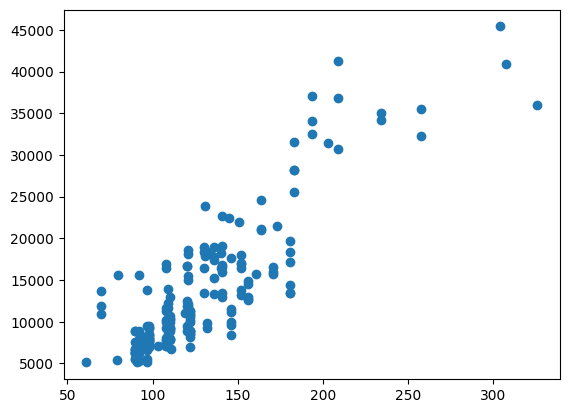

In [748]:
plt.scatter(x=df['enginesize'],y=df['price'])

In [749]:
df=df[['wheelbase','carwidth','carlength','curbweight','enginesize','boreratio','stroke','compressionratio','peakrpm','horsepower','citympg','highwaympg','price']]
# Calculate z-scores for each column
z_scores = np.abs(zscore(df))

# Set a z-score threshold for outlier detection
z_score_threshold = 2.0

# Identify outliers
outliers = (z_scores > z_score_threshold).any(axis=1)

# Remove rows with outliers
df_no_outliers = df[~outliers]

In [751]:
df_no_outliers

,wheelbase,carwidth,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,peakrpm,horsepower,citympg,highwaympg,price
0,88.6,64.1,168.8,2548,130,3.47,2.68,9.0,5000.0,111.0,21.0,27.0,13495.0
1,88.6,64.1,168.8,2548,130,3.47,2.68,9.0,5000.0,111.0,21.0,27.0,16500.0
3,99.8,66.2,176.6,2337,109,3.19,3.40,10.0,5500.0,102.0,24.0,30.0,13950.0
4,99.4,66.4,176.6,2824,136,3.19,3.40,8.0,5500.0,115.0,18.0,22.0,17450.0
5,99.8,66.3,177.3,2507,136,3.19,3.40,8.5,5500.0,110.0,19.0,25.0,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,104.3,67.2,188.8,3157,130,3.62,3.15,7.5,5100.0,162.0,17.0,22.0,18950.0
204,109.1,68.9,188.8,2952,141,3.78,3.15,9.5,5400.0,114.0,23.0,28.0,16845.0
205,109.1,68.8,188.8,3049,141,3.78,3.15,8.7,5300.0,160.0,19.0,25.0,19045.0
206,109.1,68.9,188.8,3012,173,3.58,2.87,8.8,5500.0,134.0,18.0,23.0,21485.0


In [754]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)

In [758]:
df2=pd.DataFrame(scaled_data)

In [759]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [760]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [761]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [762]:
y_pred = model.predict(x_test)

In [763]:
mse = mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)

In [764]:
training_accuracy=model.score(x_train,y_train)
test_accuracy=model.score(x_test,y_test)

In [769]:
print("Training Accuracy: ",training_accuracy,"\nTest Accuracy: ",test_accuracy,"\n",mse,"\n",rmse,"\n",r2,"\n",adjusted_r_squared)

Training Accuracy:  0.8273537253327952 
Test Accuracy:  0.6723764351665398 
 0.36424749917303206 
 0.6035292032478893 
 0.6723764351665398 
 0.6436794805825871


"The training accuracy is 0.827 and test accuracy is 0.67237. The model is overfitting."